<a href="https://colab.research.google.com/github/NishithP2004/19CSE305_ML/blob/main/Lab_Session_04_14_08_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,x,y,class
0,8,2,red
1,6,6,blue
2,9,6,red
3,5,10,blue
4,3,2,red
5,5,2,blue
6,4,5,red
7,3,1,blue
8,10,3,red
9,10,10,blue


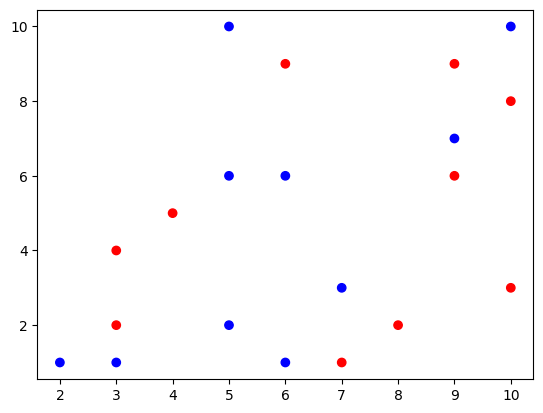

In [1]:
# A3
import pandas as pd
import random
import math as math
import matplotlib.pyplot as plt

def generate_rand_samples(n):
  samples = []

  for i in range(n):
    samples.append(math.ceil(random.random() * 10))

  return samples

def generate_rand_class(n, classes):
  samples = []

  for i in range(n):
    samples.append(classes[math.floor(random.random() * len(classes))])

  return samples


train_data_points = {
    "x": generate_rand_samples(20),
    "y": generate_rand_samples(20),
    "class": generate_rand_class(20, ["blue", "red"])
}

train_data = pd.DataFrame(train_data_points)

display(train_data)

plt.scatter(train_data["x"], train_data["y"], c=train_data["class"])

,x,y,class
0,0.0,0.0,blue
1,0.0,0.1,blue
2,0.0,0.2,blue
3,0.0,0.3,blue
4,0.0,0.4,blue
...,...,...,...
10196,10.0,9.6,red
10197,10.0,9.7,red
10198,10.0,9.8,red
10199,10.0,9.9,red


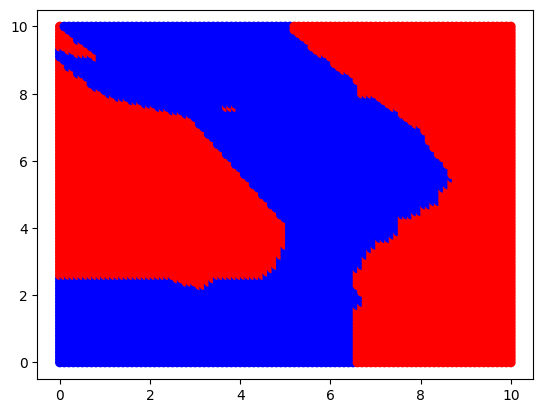

In [7]:
# A4
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import itertools

x = np.linspace(0, 10, 101)

test_data = pd.DataFrame(list(itertools.product(x, x)), columns=["x", "y"])

k = 3
model = KNeighborsClassifier(n_neighbors=k)

X_train = train_data[["x", "y"]]
y_train = [0 if c == "blue" else 1 for c in train_data["class"]]

X_test = test_data[["x", "y"]]

model.fit(X_train, y_train)

y_test = model.predict(X_test)
test_data["class"] = ["blue" if c == 0 else "red" for c in y_test]

display(test_data)

plt.scatter(test_data["x"], test_data["y"], c=test_data["class"])

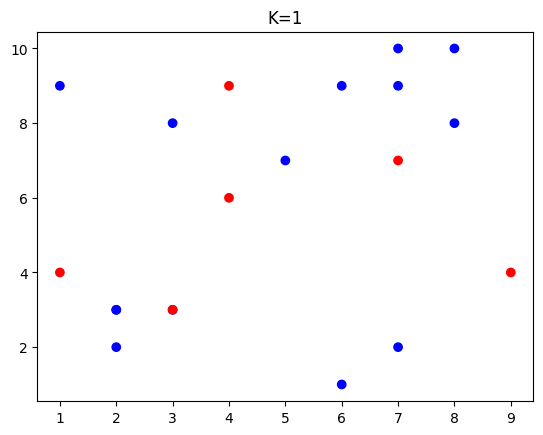

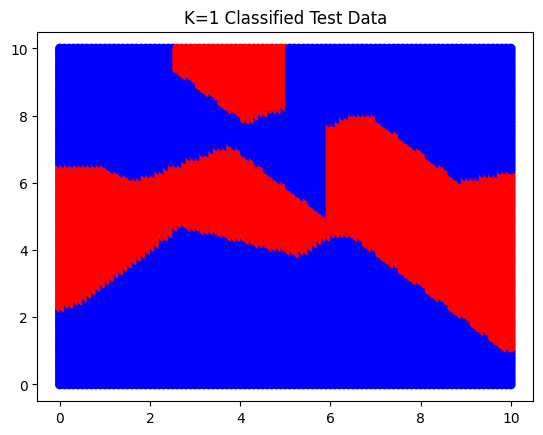

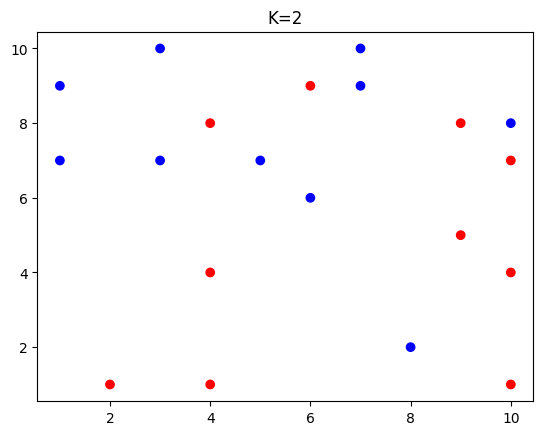

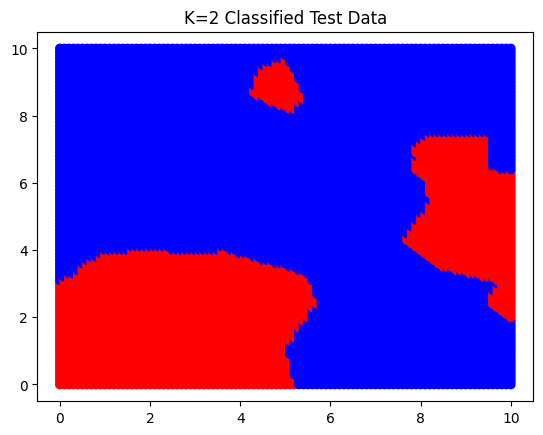

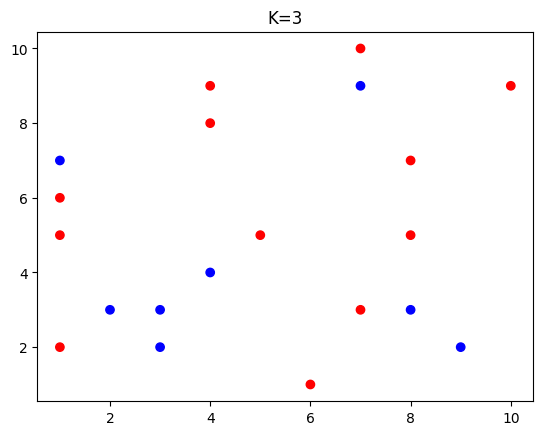

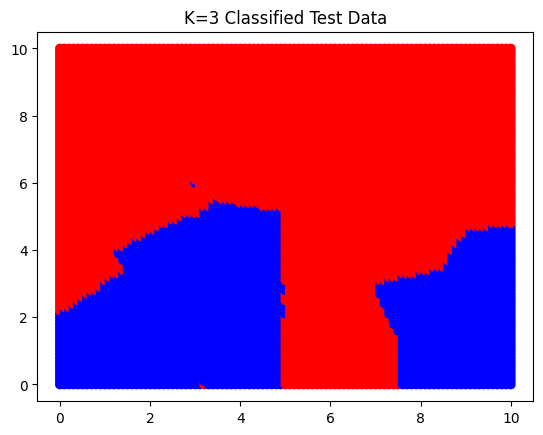

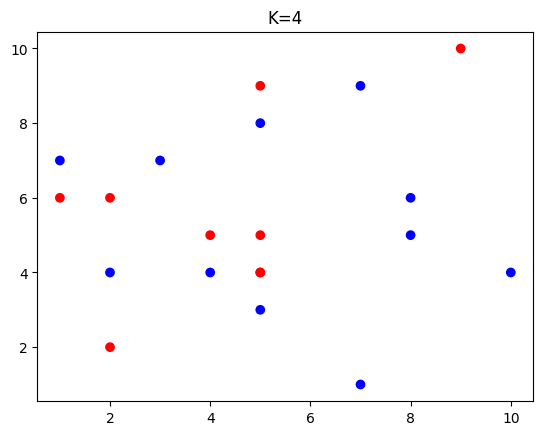

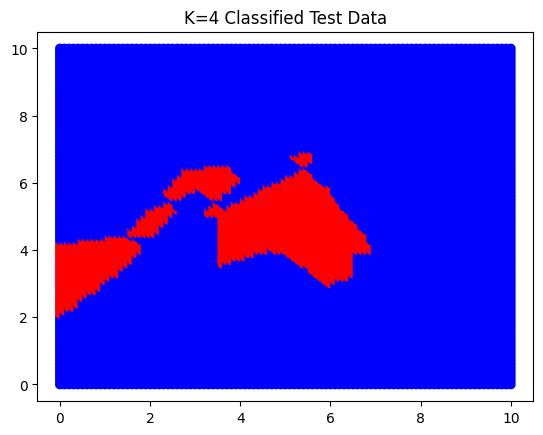

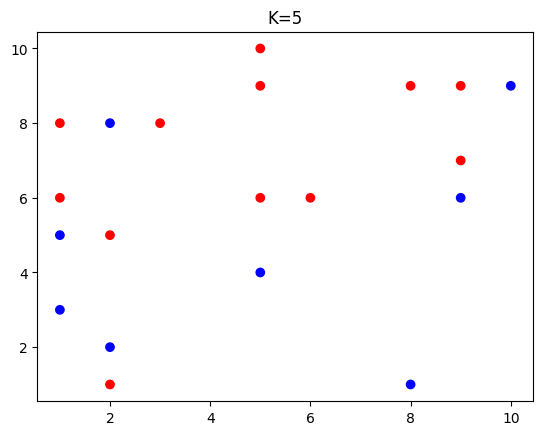

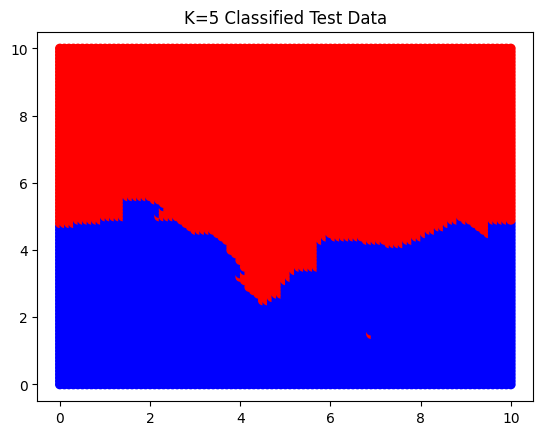

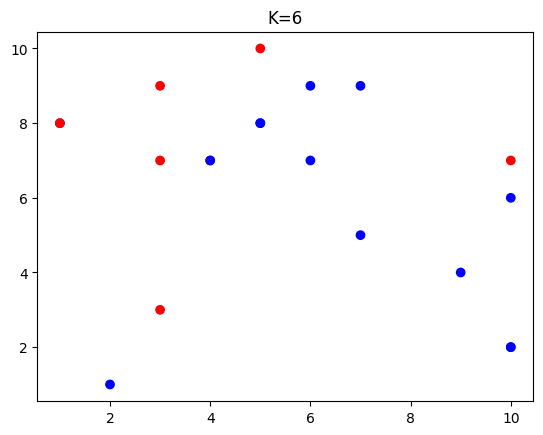

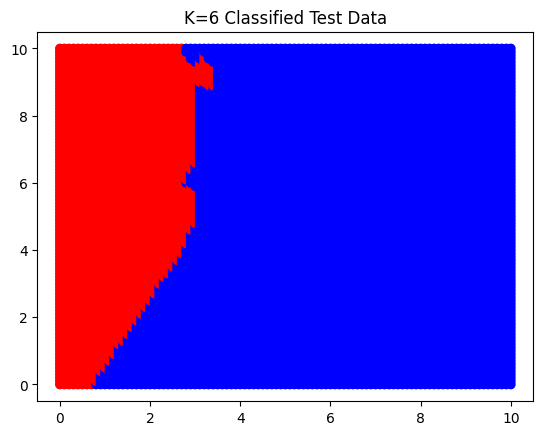

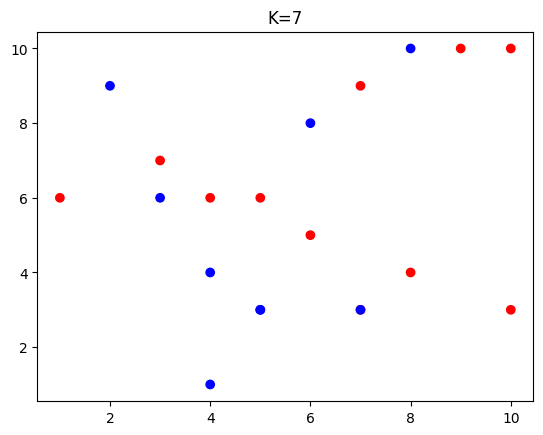

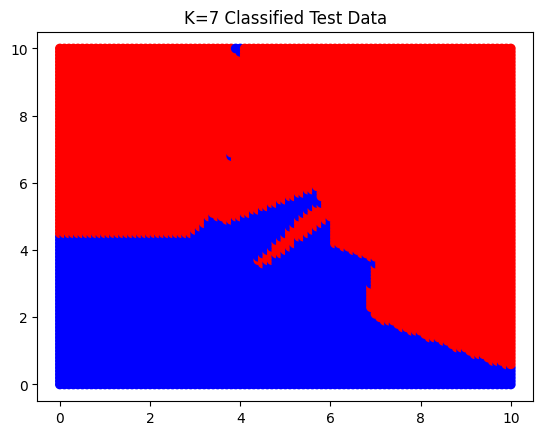

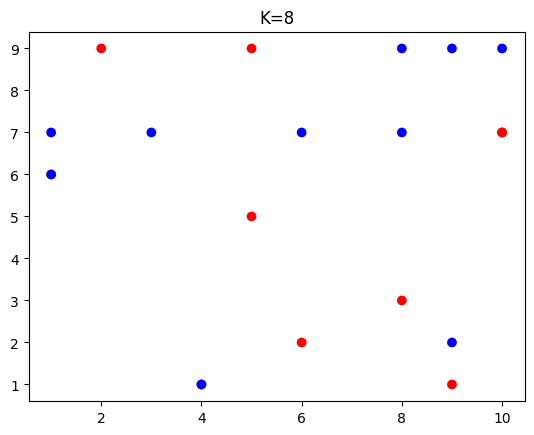

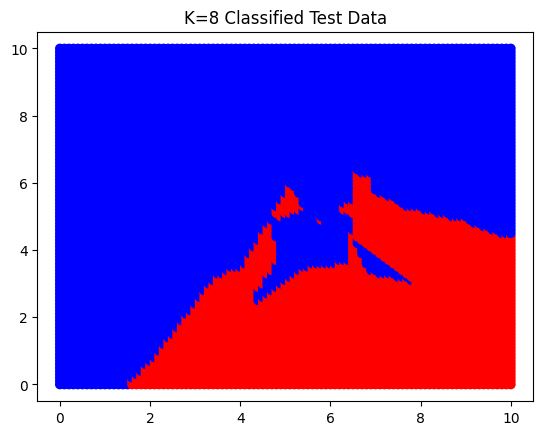

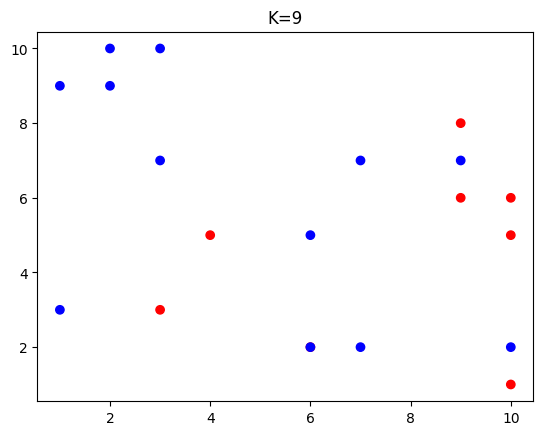

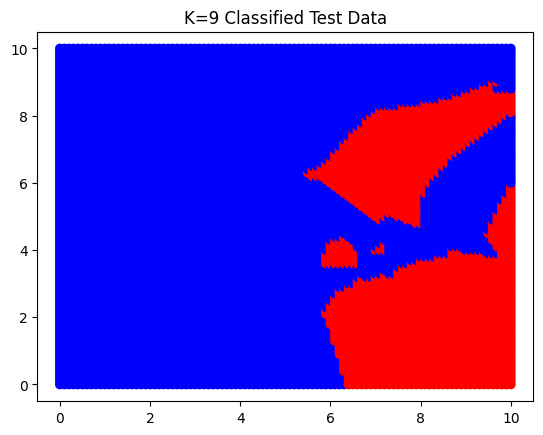

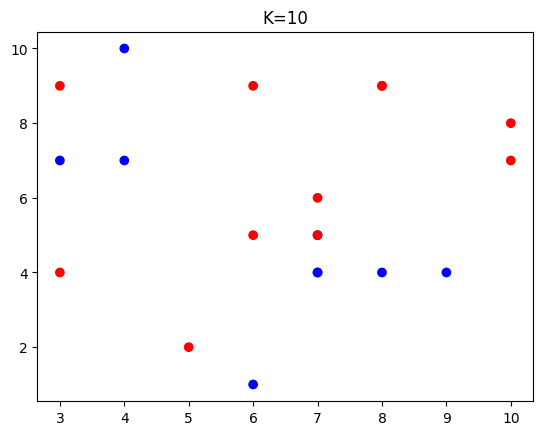

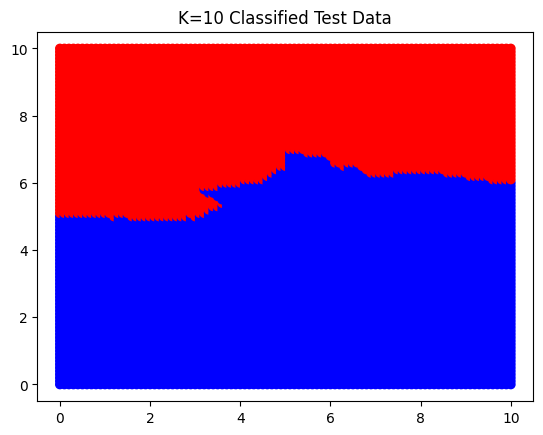

In [10]:
# A5, A6

r = 10

for i in range(1, r + 1):
    train_d_p = {
        "x": generate_rand_samples(20),
        "y": generate_rand_samples(20),
        "class": generate_rand_class(20, ["blue", "red"])
    }

    train_d = pd.DataFrame(train_d_p)
    plt.scatter(train_d["x"], train_d["y"], c=train_d["class"])
    plt.title(f'K={i}')
    plt.show()

    test_d = pd.DataFrame(list(itertools.product(x, x)), columns=["x", "y"])

    k = i
    m = KNeighborsClassifier(n_neighbors=k)

    X_train = train_d[["x", "y"]]
    y_train = [0 if c == "blue" else 1 for c in train_d["class"]]

    X_test = test_d[["x", "y"]]

    m.fit(X_train, y_train)

    y_test = m.predict(X_test)
    test_d["class"] = ["blue" if c == 0 else "red" for c in y_test]

    plt.scatter(test_d["x"], test_d["y"], c=test_d["class"])
    plt.title(f'K={i} Classified Test Data')
    plt.show()

In [11]:
# A7
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

clf_1 = RandomizedSearchCV(model, {
    "n_neighbors": range(1, 11)
})

clf_1.fit(train_data[["x", "y"]], y_train)

clf_1.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [12]:
clf_2 = GridSearchCV(model, {
    "n_neighbors": range(1, 11)
})

clf_2.fit(train_data[["x", "y"]], y_train)

clf_2.best_estimator_

KNeighborsClassifier(n_neighbors=10)